In [1]:
install.packages('FactoMineR')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/FactoMineR_2.8.tar.gz' ...
	OK [downloaded 3.6 Mb in 0.6 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cluster_2.1.4.tar.gz' ...
	OK [downloaded 625.5 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/ellipse_0.5.0.tar.gz' ...
	OK [downloaded 211.2 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/emmeans_1.8.7.tar.gz' ...
	OK [downloaded 2 Mb in 0.9 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/estimability_1.4.1.tar.gz' ...
	OK [downloaded 39.6 Kb in 0.4 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/flashClust_1.01-2.tar.gz' ...
	OK [downloaded 23.8 Kb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/leaps_3.1.ta

In [2]:
table <- read.table('new-data.csv',sep=',', header=TRUE, dec='.')
head(table)
#summary(table)

,Id,Depth,Depth2,Name,Long,Lat,Shore.distance
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
1,0,1029.0,1025.775,Globicephala macrorhynchus,-16.69158,27.96593,3636
2,1,905.0,1232.125,Globicephala macrorhynchus,-18.03670,27.63775,2882
3,2,1468.5,1459.475,Globicephala macrorhynchus,-16.83167,28.08167,6679
4,3,1795.0,1835.425,Globicephala macrorhynchus,-17.16700,27.95033,8748
5,4,1803.0,1821.075,Globicephala macrorhynchus,-17.21733,27.91733,11677
6,5,1260.0,1320.625,Globicephala macrorhynchus,-17.28017,27.96350,6914


                            
                             <500 500-1000 1000-2000 >2000
  Globicephala macrorhynchus    8       11        83     5
  Stenella frontalis           54       46        48    26
  Tursiops truncatus           51       49        30     4

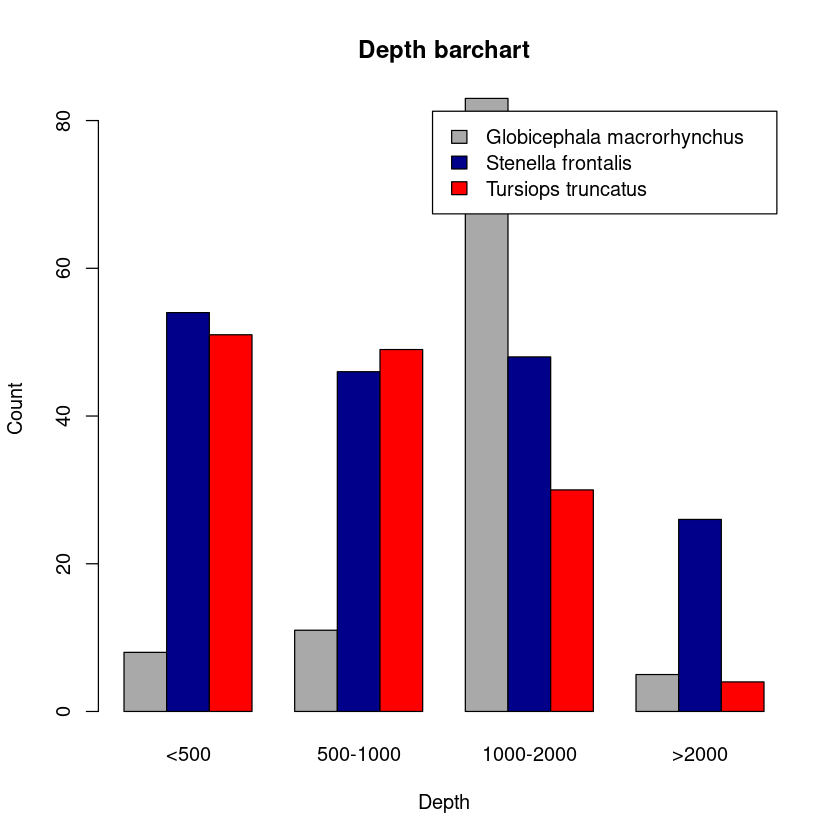

In [27]:
df <- data.frame(table$Name,table$Depth)
colnames(df) = c('species','depth')

df$cat_depth = cut(df$depth,breaks=c(0,500,1000,2000,max(df$depth)),include.lowest = TRUE,labels = c('<500','500-1000','1000-2000','>2000'))

#df

tbl_cont <- table(df$species,df$cat_depth)
tbl_cont

barplot(tbl_cont,
        main = "Depth barchart",
        xlab = "Depth", ylab = "Count",
        col = c("darkgrey", "darkblue", "red"),
        legend.text = rownames(tbl_cont),
        beside = TRUE) # Grouped bars


## Chi2 test


In [25]:
print("Observed values")
tbl_cont

resultat = chisq.test(tbl_cont)
resultat

print("Expected values")
as.table(round(resultat$expected, 1))

print("Contributions")
round(100 * resultat$residuals^2 / resultat$statistic, 1)

print("Residuals")
round(resultat$residuals, 3)

[1] "Observed values"


                            
                             <500 500-1000 1000-2000 >2000
  Globicephala macrorhynchus    8       11        83     5
  Stenella frontalis           54       46        48    26
  Tursiops truncatus           51       49        30     4


	Pearson's Chi-squared test

data:  tbl_cont
X-squared = 109.87, df = 6, p-value < 2.2e-16


[1] "Expected values"


                            
                             <500 500-1000 1000-2000 >2000
  Globicephala macrorhynchus 29.1     27.3      41.5   9.0
  Stenella frontalis         47.4     44.4      67.5  14.7
  Tursiops truncatus         36.5     34.2      52.0  11.3

[1] "Contributions"


                            
                             <500 500-1000 1000-2000 >2000
  Globicephala macrorhynchus 14.0      8.9      37.7   1.6
  Stenella frontalis          0.8      0.0       5.1   8.0
  Tursiops truncatus          5.3      5.8       8.5   4.3

[1] "Residuals"


                            
                               <500 500-1000 1000-2000  >2000
  Globicephala macrorhynchus -3.916   -3.124     6.440 -1.340
  Stenella frontalis          0.962    0.233    -2.374  2.956
  Tursiops truncatus          2.403    2.525    -3.049 -2.172

## AFC


Call:
CA(X = tbl_cont) 

The chi square of independence between the two variables is equal to 109.8713 (p-value =  2.168931e-21 ).

Eigenvalues
                      Dim.1  Dim.2
Variance               0.23   0.04
% of var.             85.41  14.59
Cumulative % of var.  85.41 100.00

Rows
                             Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr
Globicephala macrorhynchus |    164.70 |  -0.80  72.56   1.00 |  -0.05   1.66
Stenella frontalis         |     37.00 |   0.20   7.77   0.47 |   0.22  50.30
Tursiops truncatus         |     63.05 |   0.37  19.67   0.71 |  -0.24  48.04
                             cos2  
Globicephala macrorhynchus   0.00 |
Stenella frontalis           0.53 |
Tursiops truncatus           0.29 |

Columns
                             Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr
<500                       |     53.08 |   0.44  23.23   0.99 |  -0.05   1.43
500-1000                   |     39.01 |   0.37  15.76   0.91 |  -0.11   8.71
1000-2000 

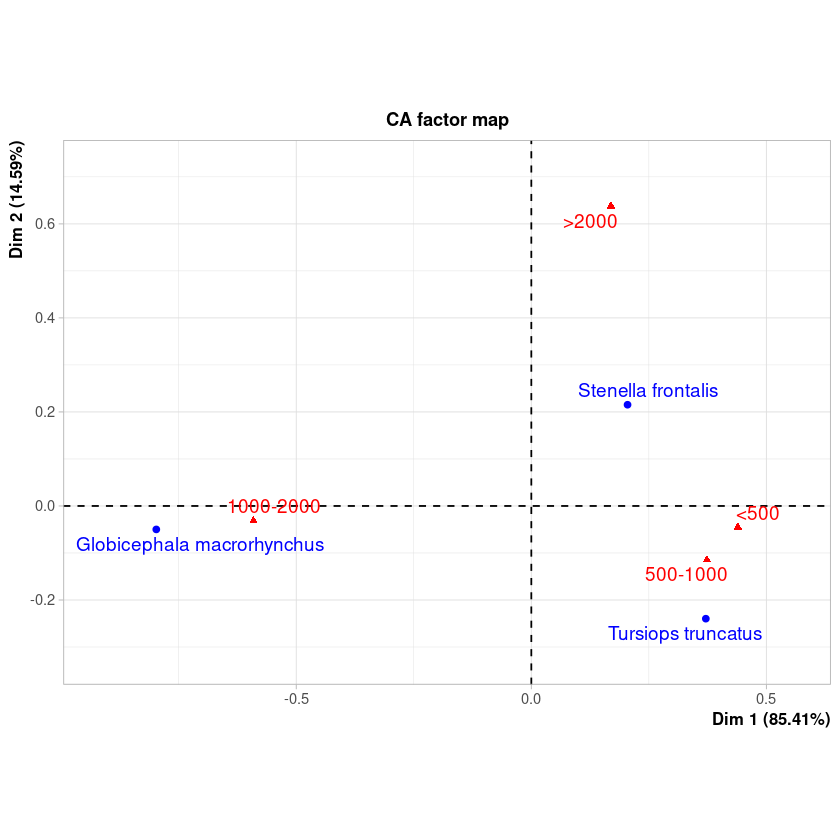

In [5]:
library(FactoMineR)
res.ca <- CA(tbl_cont)
summary(res.ca, nb.dec = 2, ncp = 2, nbelements = 4)